## Plot graph and basic analysis

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [9]:
# read .gml file
graph = nx.read_gml('article1.gml')

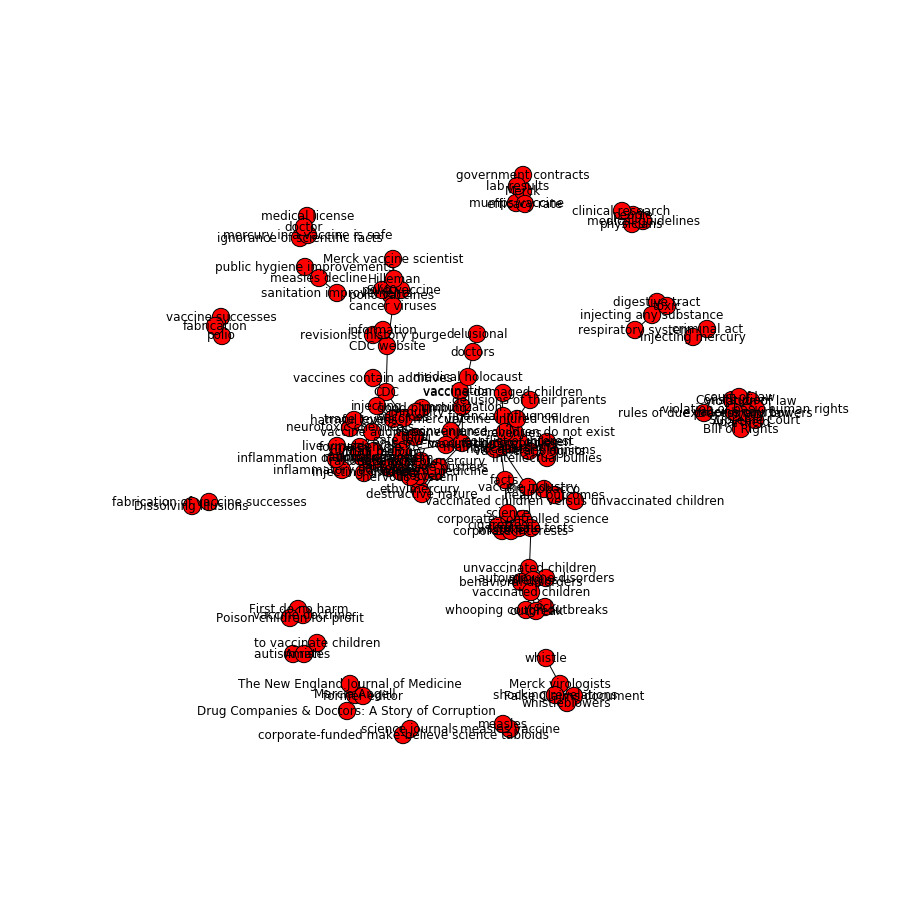

In [10]:
# plot spring layout
plt.figure(figsize=(12,12))
nx.draw_spring(graph, with_labels=True, arrows=True)